# **Deep Computer Vision Using Convolutional Neural Networks**

# Notes

* Vision tasks are easy for us and effortless
* The answer lies in the fact that perception largely takes place outside the realm of our
  * consciousness, within specialized visual, auditory, and other sensory modules in our brains. 
* Convolutional neural networks (CNNs) emerged from the study of the brain’s visual cortex,
* CNNs have managed to achieve superhuman performance on some complex visual
  * tasks. They power image search services, self-driving cars, 
  * automatic video classification systems, and more.
* CNNs are not restricted to visual perception: but also, to voice recognition
  * and natural language processing
* we will discuss some of the best CNN architectures,
  *  as well as other visual tasks, including object detection
  *  (classifying multiple objects in an image and placing bounding boxes around them)
  *  and semantic segmentation (classifying each pixel according to the class of the object it belongs to).

# Architecture of the Visual cortex

* Many neurons in the visual cortex have a small local receptive field
  * meaning they react only to visual stimuli located in a limited region of the visual field
* 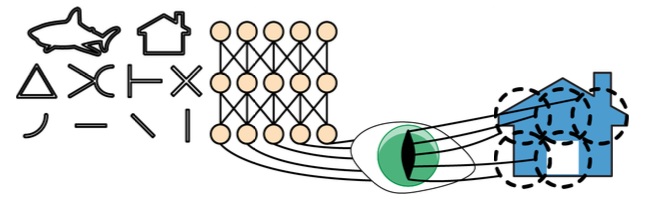
* Biological neurons in the visual cortex respond to specific patterns in small
  * regions of the visual field called receptive fields
  * as teh visual signal makes its way through consecutive brain modules, 
  * neurons respond to more complex patterns in larger receptive fields

* the authors showed that some neurons react only to images of horizontal
  * lines, while others react only to lines with different orientations 
  * (two neurons may have the same receptive field but react to different line orientations).
* These observations led to the idea that the higher-level neurons
  *  are based on the outputs of neighboring lower-level neurons
*  This powerful architecture is able to detect
   *  all sorts of complex patterns in any area of the visual field.
*  Famous **paper by Yann LeCunn, 1998 is LeNet-5 architecture**
*  Two new building blocks: convolutional layers and pooling layers
*  Example:
   *  a 100 × 100–pixel image has 10,000 pixels,
   *  and if the first layer has just 1,000 neurons
*  CNNs solve this problem using partially connected layers and weight sharing.

# Convolutional Layers

* convolutional layer, has neurons in the first convolutional layer
  *  are not connected to every single pixel in the input image
  *  but only to pixels in their receptive fields
  * 
*  In turn, each neuron in the second convolutional layer is connected only to neurons located
   *  within a small rectangle in the first layer.
   *  This architecture allows the network to concentrate on small low-level features in the 
   *  first hidden layer, then assemble them into larger higher level features
   *  in the next hidden layer 
*  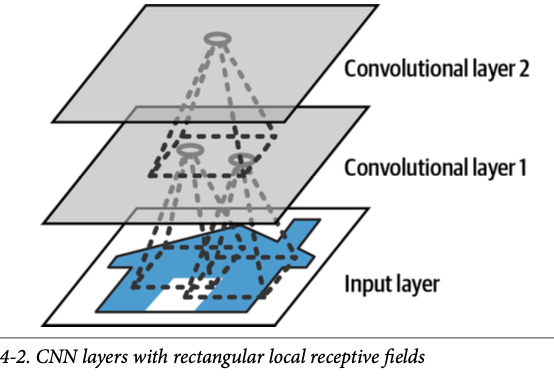

* Regular NN, has to get 1D before feedinng them
* In a CNN each layer is represented in 2D, which
  * makes it easier to match neurons with their corresponding inputs
* In order for a layer to have the same height and width as the previous layer, 
  * it is common to add zeros around the inputs, as shown in the diagram. 
  * This is **called zero padding**
* It is also possible to connect a large input layer to a much smaller layer by spacing out
  * the receptive fields, as shown in Figure 14-4. This dramatically reduces the model’s
  * computational complexity. The horizontal or vertical step size from 
  * one receptive field to the next is called the stride. 
* example :
  * using 3 X 3 receptive fields and a stride of 2 , 
  * in this example the stride is the same in both directions, but it does not have to be so
* 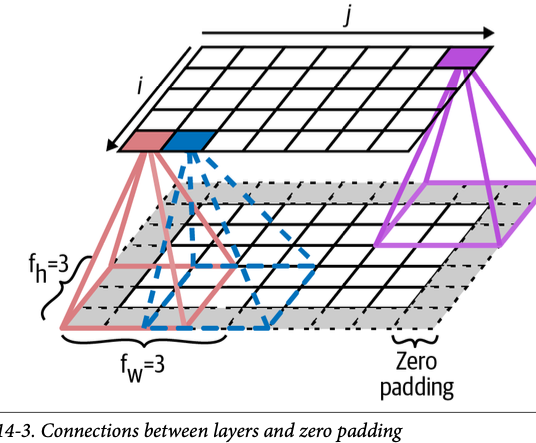
* 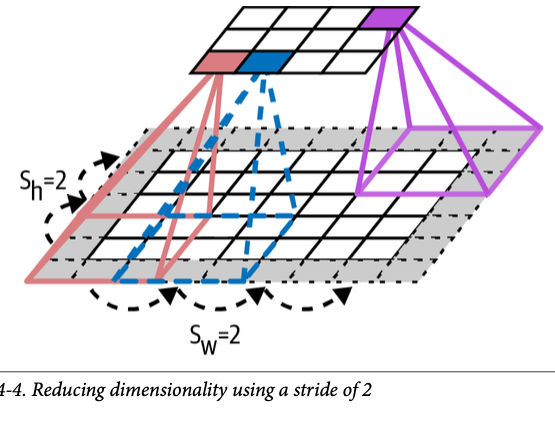

## Filters

* A neuron’s weights can be represented as a small image the size of the receptive
  * field. For example, Figure 14-5 shows two possible sets of weights, called filters (or
  * convolution kernels, or just kernels). The first one is represented as a black square with
  * a vertical white line in the middle (it’s a 7 × 7 matrix full of 0s except for the central
  * column, which is full of 1s); neurons using these weights will ignore everything
  * in their receptive field except for the central vertical line (since all inputs will be
  * multiplied by 0, except for the ones in the central vertical line).
* Now if all neurons in a layer use the same vertical line filter (and the same bias
* term), and you feed the network the input image shown in Figure 14-5 (the bottom
* image), the layer will output the top-left image. Notice that the vertical white lines
* get enhanced while the rest gets blurred. 
* 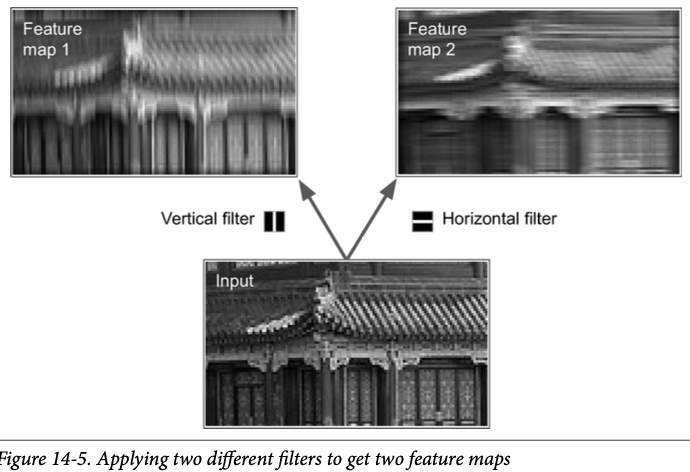
* Thus, a layer full of neurons using the same filter
  *  outputs a feature map, which highlights the areas in an image
  *  that activate the filter the most. But don’t worry, you won’t have to define the filters
  *  manually: instead, during training the convolutional layer will automatically learn the
  *  most useful filters for its task, and the layers above will learn to 
  *  combine them into more complex patterns.

## Stacking Multiple Feature Maps

* In short, a convolutional layer simultaneously applies
  * multiple trainable filters to its inputs, making it capable of detecting multiple features
  * anywhere in its inputs.
* The fact that all neurons in a feature map share the same parameters
  *  dramatically reduces the number of parameters in the model.
  * Once the CNN has learned to recognize a pattern in one location,
  *  it can recognize it in any other location. In contrast, once a fully
  * connected neural network has learned to recognize a pattern in one
  * location, it can only recognize it in that particular location.
* Input images are also composed of multiple sublayers: one per color channel. 
  * there are typically three: red, green, and blue (RGB). 
  * Grayscale images have just one channel, but some images may have many more—for example,
  * satellite images that capture extra light frequencies (such as infrared).           



# Implementing Convolutional layers with keras

In [1]:
from sklearn.datasets import load_sample_images
import tensorflow as tf 

In [2]:
images = load_sample_images()
images1 = images['images']

In [3]:
# Crop the images to 70x120 pixels
images1 = tf.keras.layers.CenterCrop(height=70, width=120)(images1)
images1 = tf.keras.layers.Rescaling(scale=1/255)(images1)

In [4]:
images1.shape

TensorShape([2, 70, 120, 3])

* keras has a convolution2D layer, alias Conv2D
* Under the hood, this layer relies on tensorflow's tf.nn.conv2d() operation

In [5]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7) # kernel_size is (7,7)
fmaps = conv_layer(images1)
fmaps.shape

TensorShape([2, 64, 114, 32])

In [6]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding='same') 
fmaps = conv_layer(images1)
fmaps.shape

TensorShape([2, 70, 120, 32])

* If the stride is greater than 1 (in any direction), then the output size will not be
equal to the input size, even if padding="same".
* Just like a Dense layer, a Conv2D layer holds all the layer’s weights, 
  * including the kernels and biases.
  *  The kernels are initialized randomly, while the biases are initialized to zero.
*  The number of output channels is equal to the number of output feature maps, 
   *  which is also equal to the number of filters.
*  convolutional layers have quite a few hyperparameters: filters,
   *  kernel_size, padding, strides, activation, kernel_initializer, 
  
 

# Memory Requirements

* During inference (i.e., when making a prediction for a new instance) the RAM
  * occupied by one layer can be released as soon as the next layer has been computed,
  * so you only need as much RAM as required by two consecutive layers. But during
  * training everything computed during the forward pass needs to be preserved for the
  * reverse pass, so the amount of RAM needed is (at least) the total amount of RAM
  * required by all layers.
* If training crashes because of an out-of-memory error, you can try
  * reducing the mini-batch size. Alternatively, you can try reducing
  * dimensionality using a stride, removing a few layers, using 16-bit
  * floats instead of 32-bit floats, or distributing the CNN across multiple devices
* 

# Pooling Layers

* Their goal is to subsample (i.e., shrink) the input image in order to
  * reduce the computational load, the memory usage, and the number of parameters
  * (thereby limiting the risk of overfitting).
* However, a pooling neuron has no weights; all it does is aggregate the
  * inputs using an aggregation function such as the max or mean. Figure 14-9 shows a
  * max pooling layer, which is the most common type of pooling layer.
* 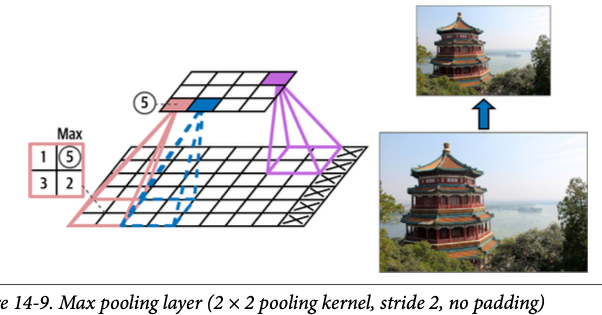

* A pooling layer typically works on every input channel independently,
  *  so the output depth (i.e., the number of channels) is the same as the input depth.
*  Other than reducing computations, memory usage, and the number of parameters,
   *  a max pooling layer also introduces some level of invariance to small translations
   *  **TRANSLATIONS INVARIANCE:** Actually, translation means shifting an iamge slightly, 
      *  e.g. moving an object a few pixels up, down left or right 
      *  in many real world scenarios, like recongnizing a a cat in a photo,
      *  small trnslations should not drastically change the output of the network
   *  so here Pooling is invariance to these translations
*  Take **semantic segmentation** (the task of classifying each pixel in an image according to the object
   *  that pixel belongs to, which we’ll explore later in this chapter): obviously, if the input
   *  image is translated by one pixel to the right, the output should also be translated by
   *  one pixel to the right. The goal in this case is **equivariance**, not invariance: a small
   *  change to the inputs should lead to a corresponding small change in the output.
*  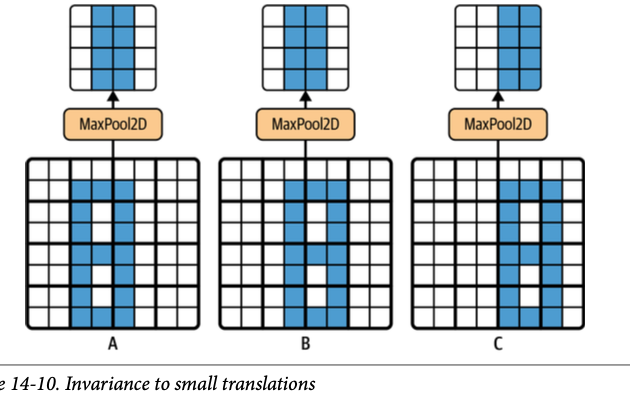

# Pooling Layers with Keras

In [ ]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)


* max pooling preserves only the strongest features, getting rid of all the meaningless ones
* max pooling offers stronger translation invariance than average pooling, and it requires slightly less compute.
* **global average pooling layer:**
  * it just outputs a single number per feature map and per instance.
    *  Although this is of course extremely
    *  destructive (most of the information in the feature map is lost), 

In [7]:
global_avg_pool = tf.keras.layers.GlobalAvgPool2D()

In [8]:
# equivalent to the following lambda layer, computes mean over spatial dimesnion ie. height and width

global_avg_pool = tf.keras.layers.Lambda(
    lambda X: tf.reduce_mean(X, axis=[1,2])
)

In [9]:
# example
global_avg_pool(images1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.64338624, 0.5971759 , 0.5824972 ],
       [0.76306933, 0.2601113 , 0.10849128]], dtype=float32)>

# CNN Architectures

* 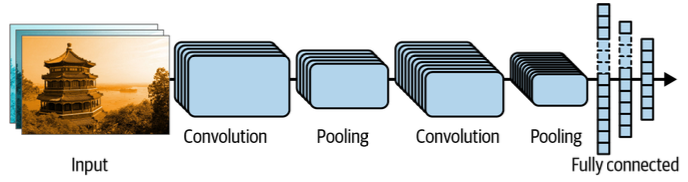
* the first convolutional layer, has a stride of 2 or more.
* This will reduce the spatial dimension of the miamge
* wihtout losing too much information, 
* and since the input image only has three channels in general

In [11]:
## Basic CNN for fashion MNIST

from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, 
                        kernel_size=3,
                        padding='same',
                        activation='relu',
                        kernel_initializer='he_normal')


model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28,28,1]),
    
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_initializer='he_normal',
                          ),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu',
                          kernel_initializer='he_normal',),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
    
    
    
])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* DefaultConv2D, uses the default stride of 1 because the input images are not very large
  
* **Note that the number of filters doubles as we climb up the CNN toward the**
  * output layer (it is initially 64, then 128, then 256): it makes sense for it to grow,
  * since the number of low-level features is often fairly low (e.g., small circles,
  * horizontal lines), but there are many different ways to combine them into higher-
  * level features. It is a common practice to double the number of filters after each
  * pooling layer: since a pooling layer divides each spatial dimension by a factor of
  * 2, we can afford to double the number of feature maps in the next layer without
  * fear of exploding the number of parameters, memory usage, or computational load.
* Over the years, variants of this fundamental architecture have been developed, 
  * leading to amazing advances in the field. A good measure of this progress is the error
    * rate in competitions such as the **ILSVRC ImageNet challenge.** 

# LeNet-5

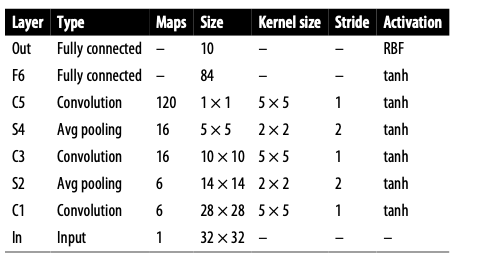

# AlexNet

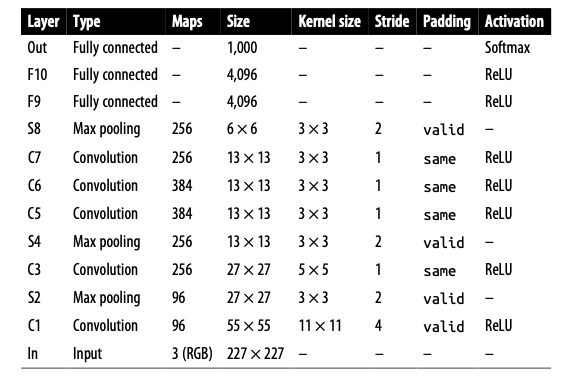

# Data Augmentation

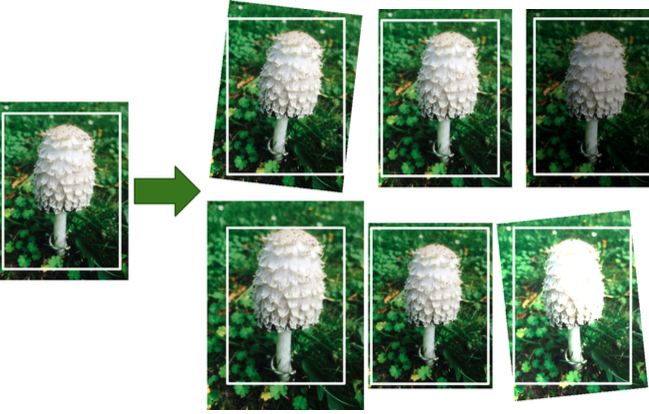
* Data Augmentation, artificially increases the size of the training
  *  set by generating many realiztic variants of each training instance. 
  *  this reduces overfitting, making this **a regularization technique.**
*  Simply adding white noise will not help;
   *  the modifications hould be learnable, white noise is not
*  In general, you can also flip the pictures horizontally,
   *  except for text and other asymmetrical objects.
*  Data Augmentation is also useful when you have an unbalanced dataset
   *  you can use is to generate more samples of the less frequent classes
   *  This is called the **synthetic minority oversampling technique or SMOTE**